In [2]:
%load_ext autoreload
%load_ext memory_profiler
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist
settings_path = 'settings/tropics_20d.yaml'

In [4]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
st = storm_tracker.StormTracker(gr, overwrite_storms = False, overwrite = False) #overwrite = True is super long

Data loaded from /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/DYAMOND_SAM_post_20_days_Tropics/grid_attributes.pkl instead of computing
Loading storms...
loading storms from pkl
Time elapsed for loading storms: 26.65 seconds


# Make the surface x treshold joint distrib

In [5]:
jd = joint_distrib.JointDistribution(gr, st, 
                                     var_id_1= "Sigma_cond_alpha_50_Prec", 
                                     var_id_2="Treshold_cond_alpha_50_Prec", 
                                     overwrite = True, 
                                     dist_bintype = 'invlogQ', 
                                     nd = 5)

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.42 seconds


In [7]:
lm = gr.get_landmask()
land = lm.Landmask == 1
ocean = lm.Landmask == 0

In [25]:
# jd = joint_distrib.JointDistribution(gr, st, 
#                                      var_id_1= "Sigma_cond_alpha_50_Prec", 
#                                      var_id_2="Treshold_cond_alpha_50_Prec", 
#                                      overwrite = True, 
#                                      dist_bintype = 'linear')

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.59 seconds


# Mean Prec in new graph ? 


/home/mcarenso/code/tempest/tempest/joint_distrib.py:890: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


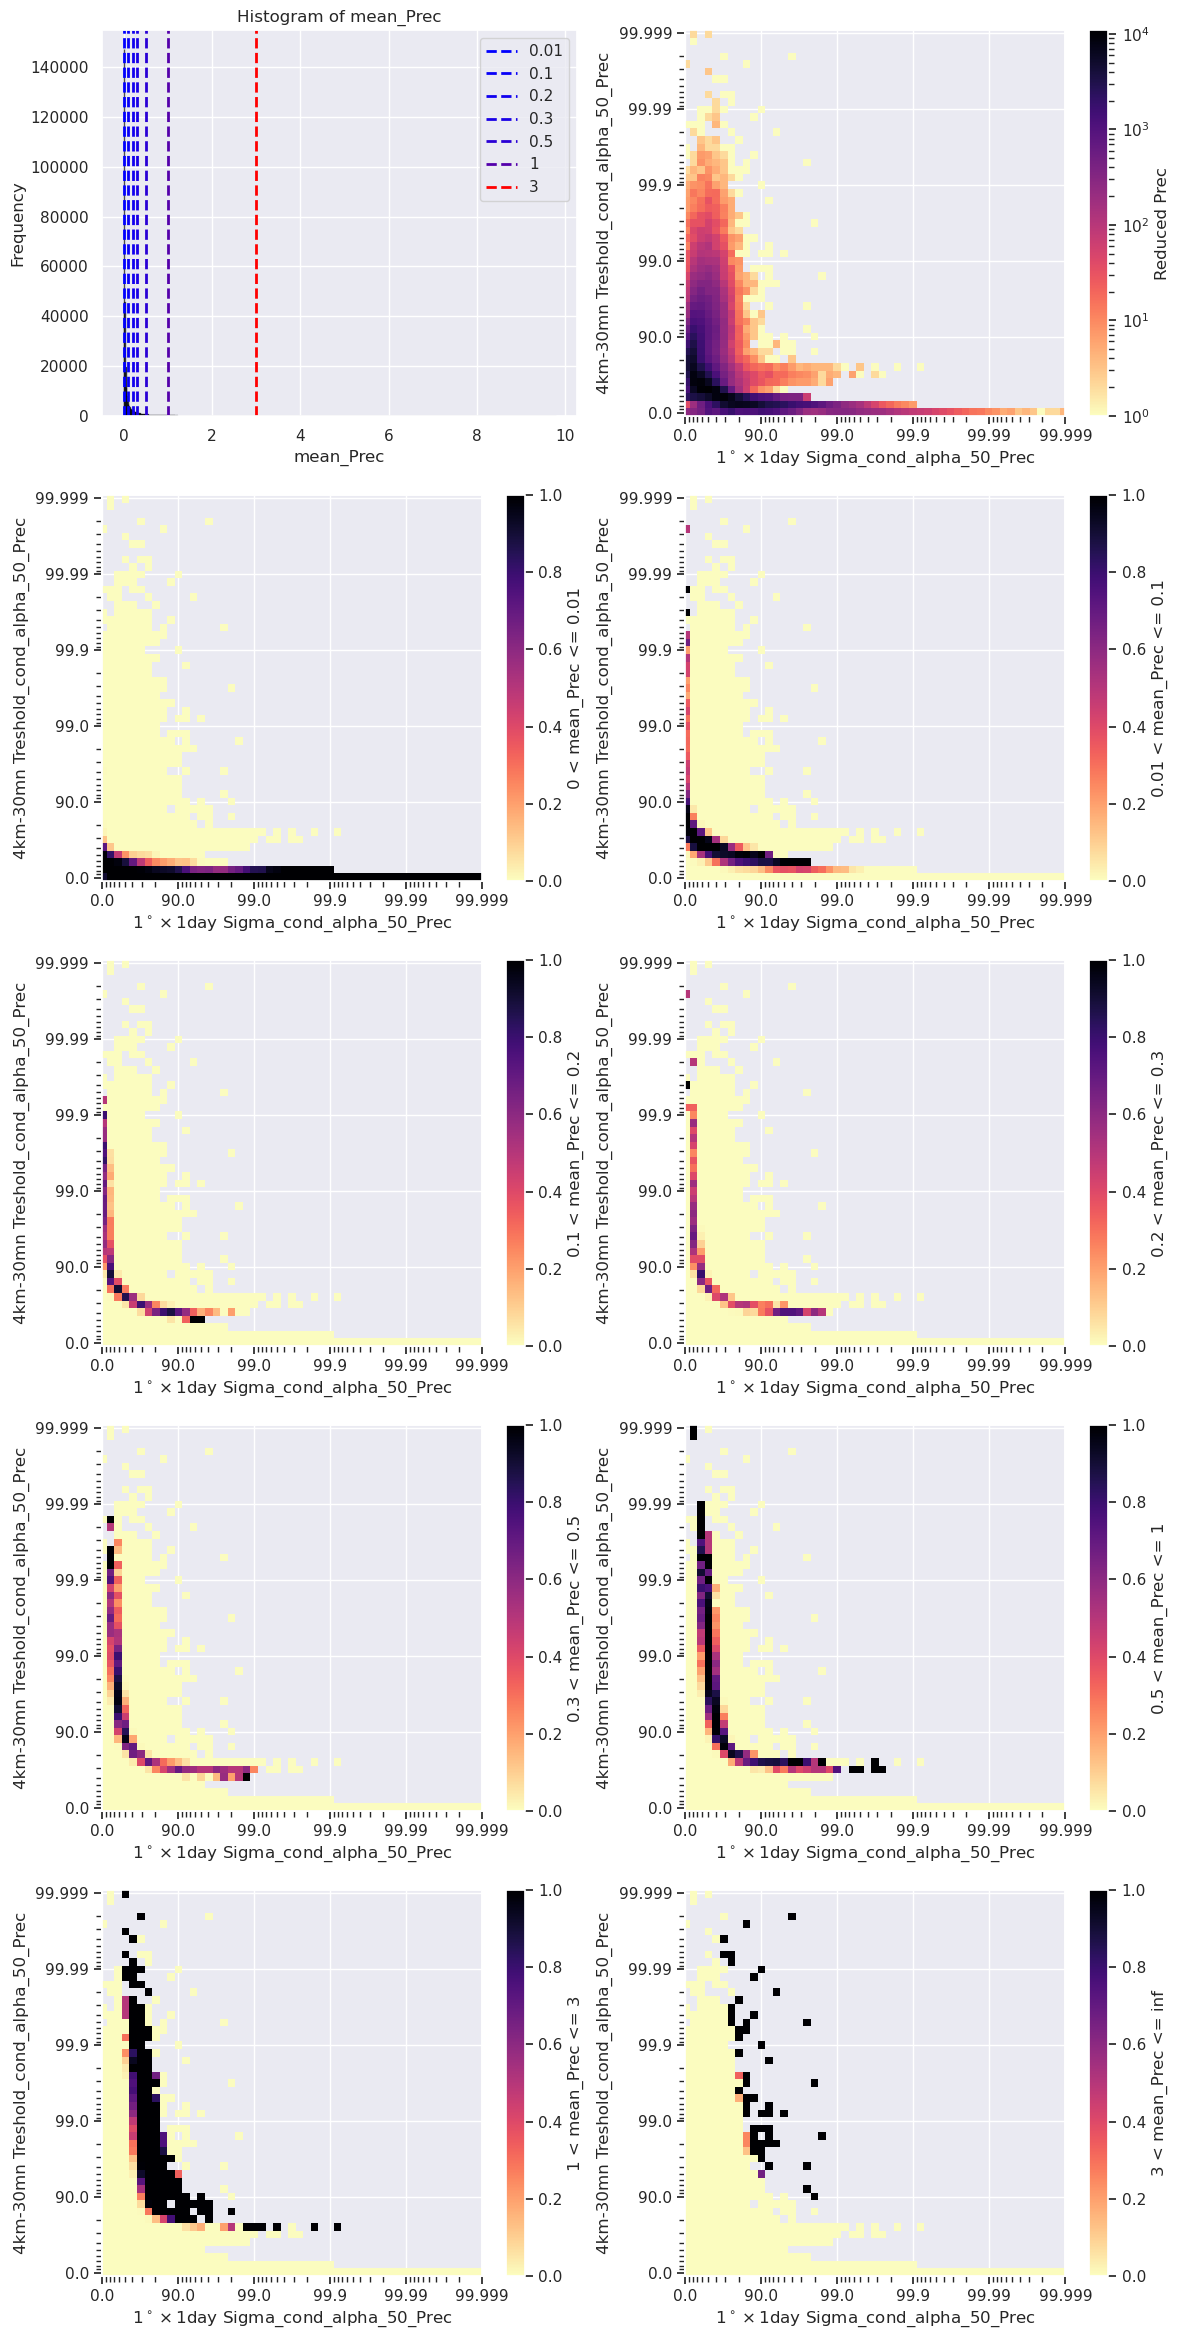

In [19]:
%matplotlib inline
cond_var = [0, 0.01, 0.1, 0.2, 0.3, 0.5, 1, 3, +np.inf]
var_id = "Prec"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean , func=func)
plt.tight_layout()

## OM850 cond by Prec with lag 1 over Ocean

/home/mcarenso/code/tempest/tempest/joint_distrib.py:890: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


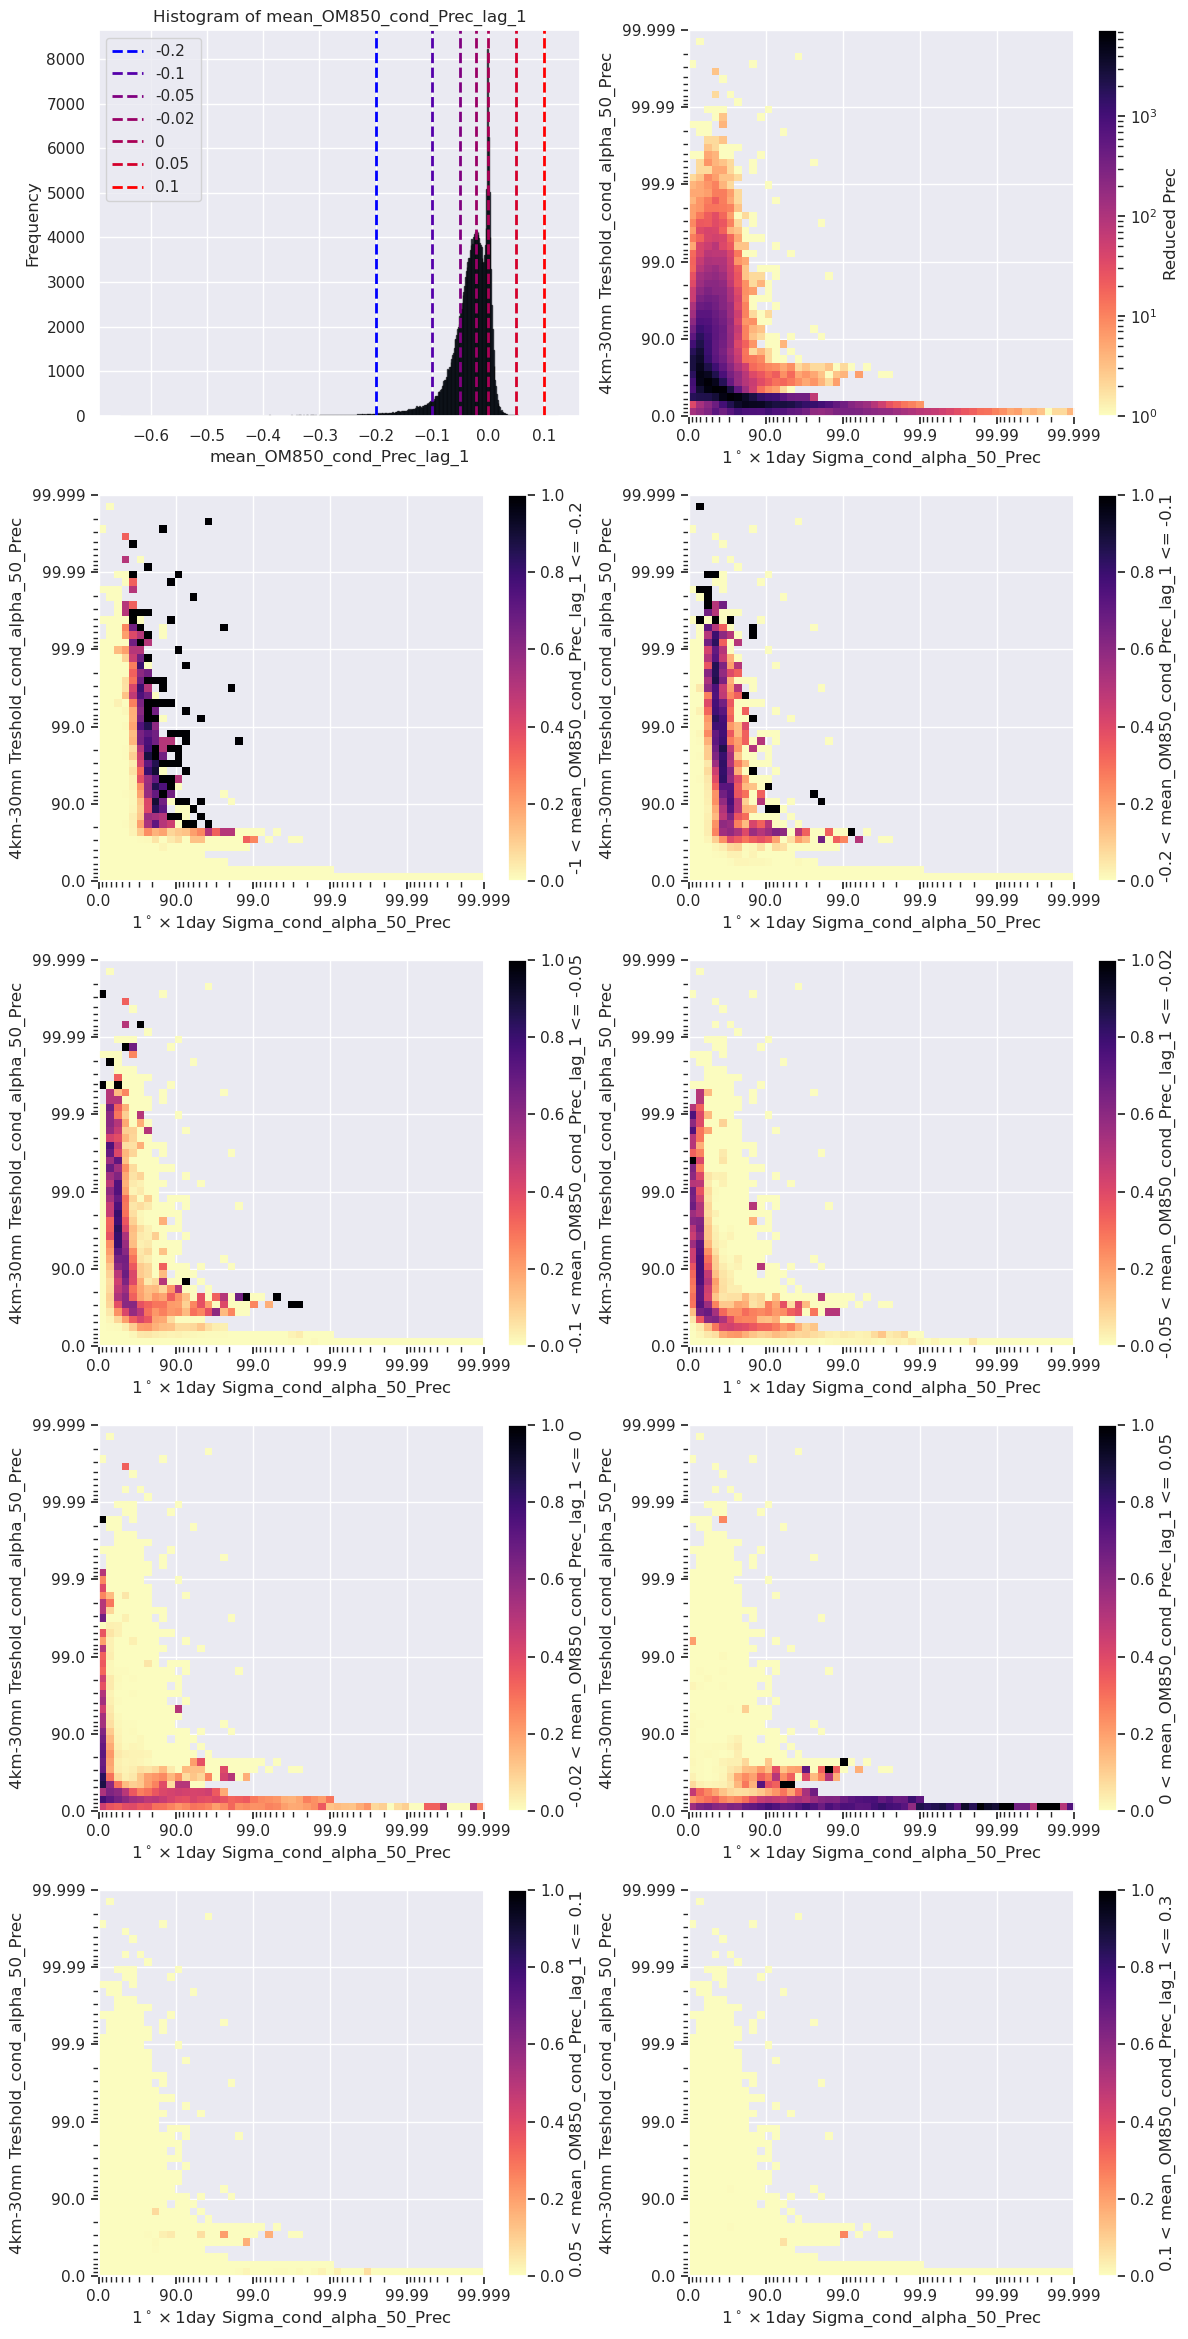

In [8]:
%matplotlib inline
cond_var = [-1, -0.2, -0.1, -0.05, -0.02, 0, 0.05, 0.1, 0.3]
var_id = "OM850_cond_Prec_lag_1"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)
plt.tight_layout()

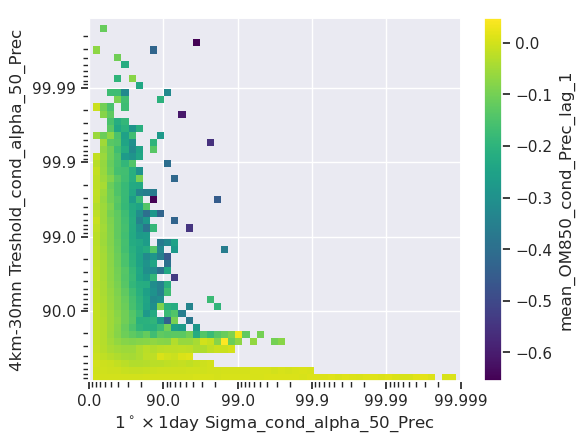

In [9]:
jd.plot_var_id_func_over_jdist('OM850_cond_Prec_lag_1', func = 'mean', mask = ocean)

## neg OM850 cond by Prec with lag 1 over Ocean

/home/mcarenso/code/tempest/tempest/joint_distrib.py:890: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


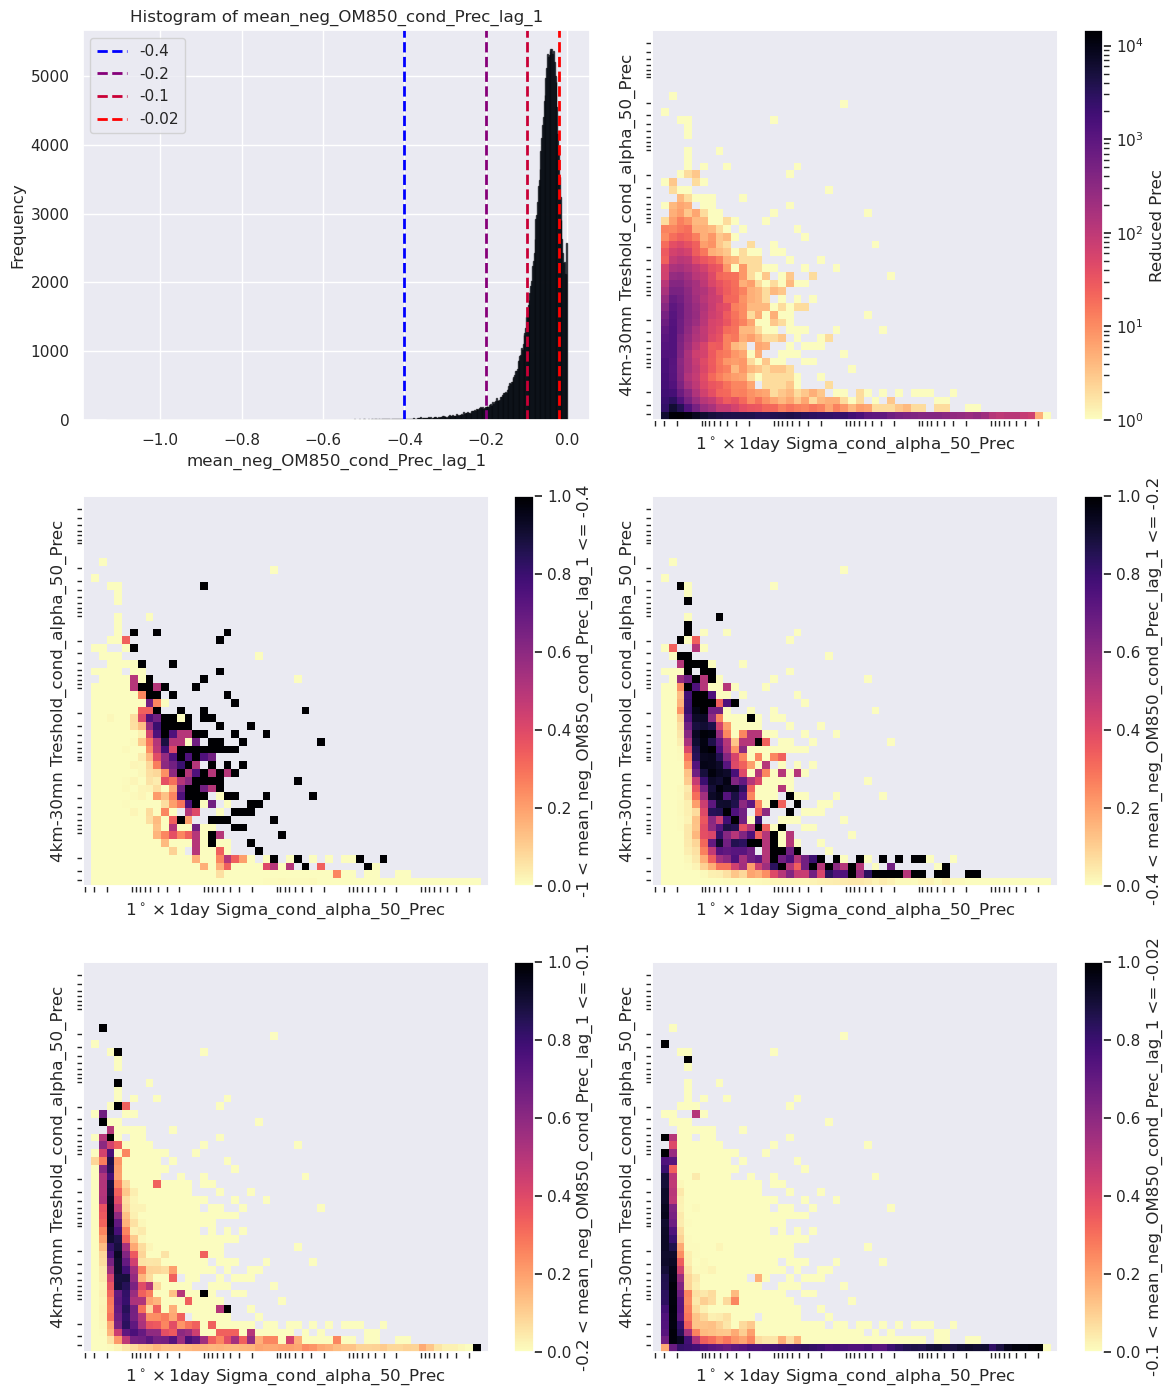

In [32]:
%matplotlib inline
cond_var = [-1, -0.4, -0.2, -0.1, -0.02, 0]
var_id = "neg_OM850_cond_Prec_lag_1"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)
plt.tight_layout()

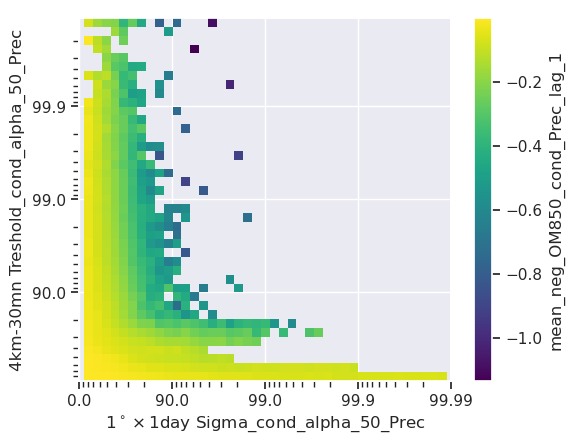

In [33]:
jd.plot_var_id_func_over_jdist('neg_OM850_cond_Prec_lag_1', func = 'mean', mask = ocean)

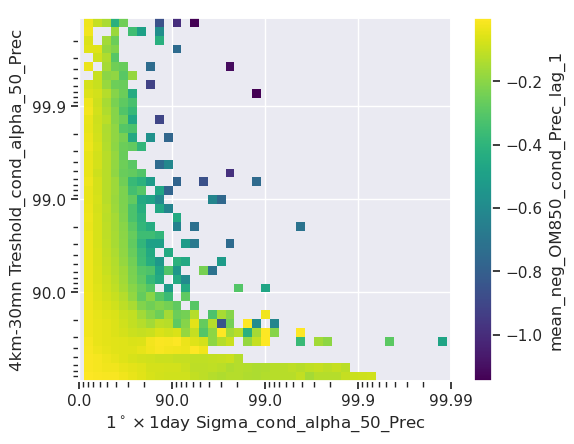

In [23]:
jd.plot_var_id_func_over_jdist('neg_OM850_cond_Prec_lag_1', func = 'mean', mask = land)

## QV* 2D

In [19]:
var_id = "QV_sat_2d"
func = "mean"

/home/mcarenso/code/tempest/tempest/joint_distrib.py:886: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


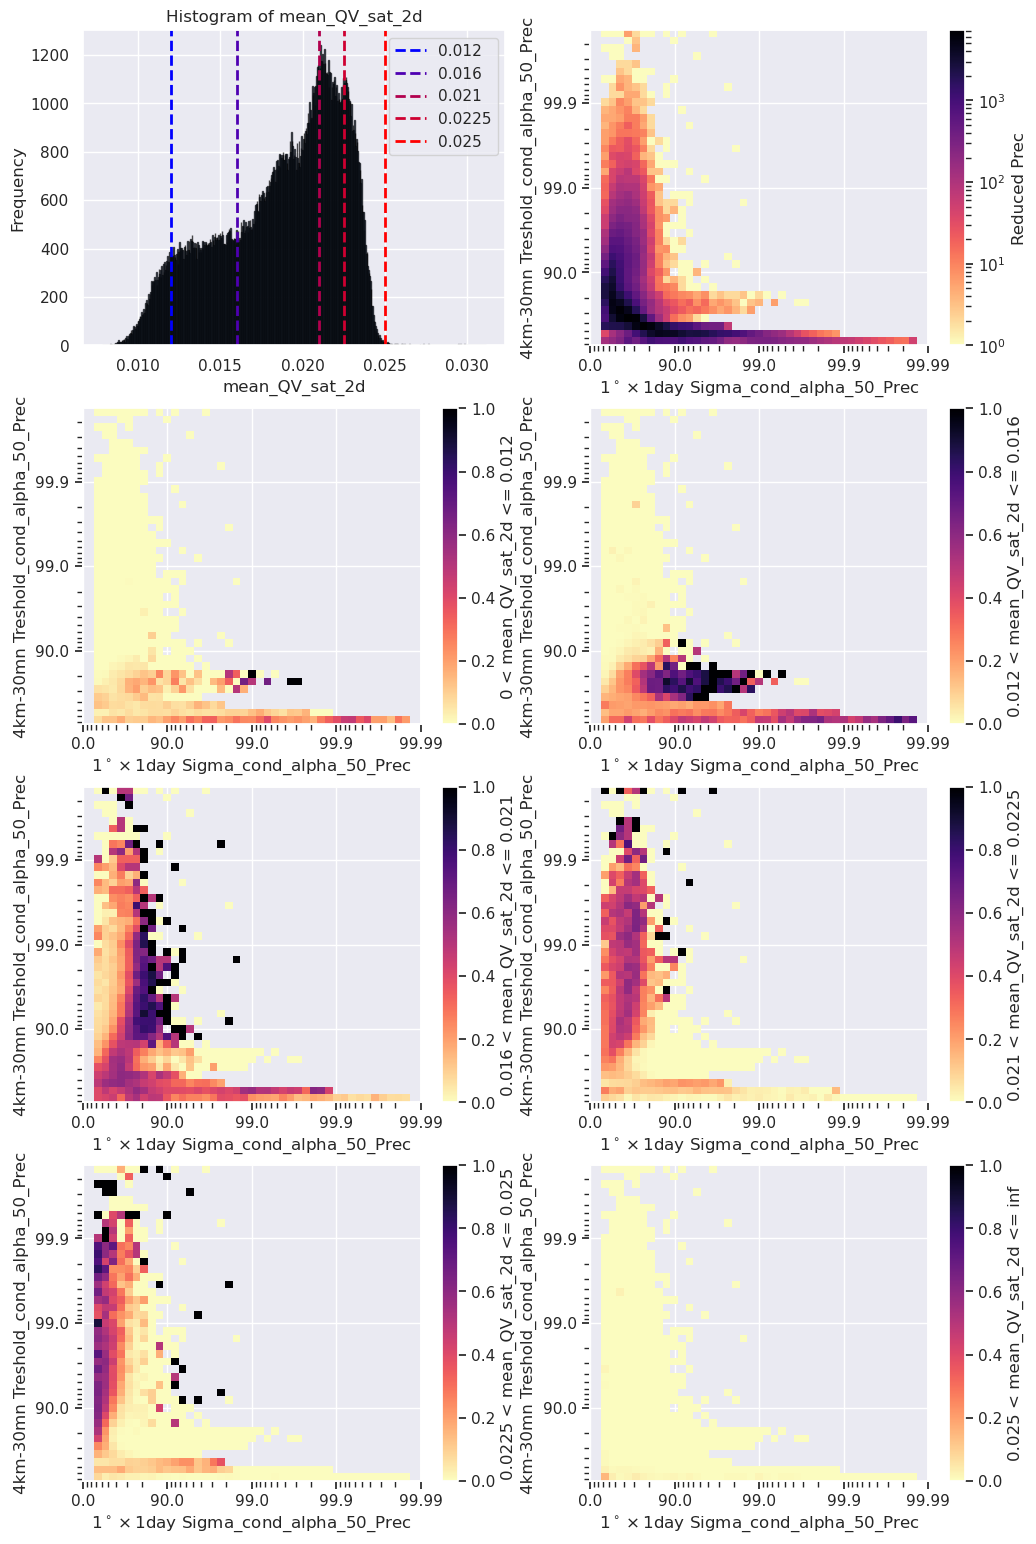

In [9]:
%matplotlib inline

cond_var = [0, 0.012, 0.016, 0.021, 0.0225, 0.025, +np.inf]
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)

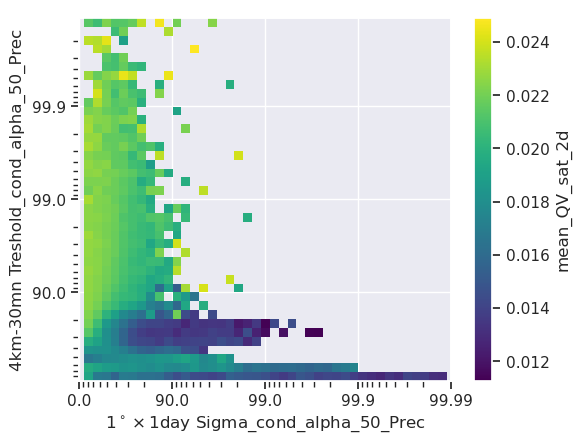

In [10]:
jd.plot_var_id_func_over_jdist(var_id, func = func, mask = ocean)

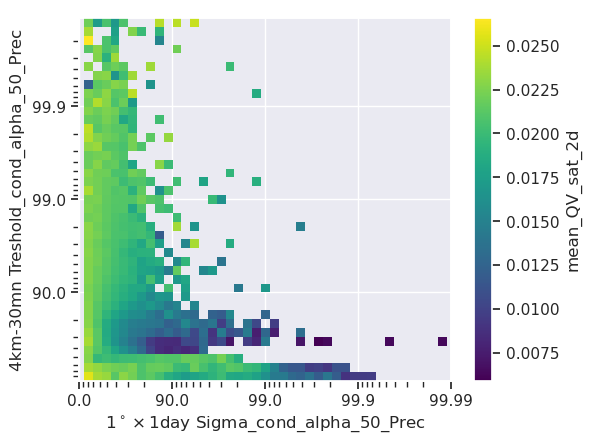

In [22]:
jd.plot_var_id_func_over_jdist(var_id, func = func, mask = land)

In [15]:
var = gr.get_var_id_ds(var_id)

## MCS

/home/mcarenso/code/tempest/tempest/joint_distrib.py:712: RuntimeWarning: invalid value encountered in scalar divide
  bin_fraction_mcs[i_bin,j_bin] = count_bin_mcs/count_bin


<AxesSubplot:xlabel='1$^\\circ\\times 1$day Sigma_cond_alpha_50_Prec', ylabel='4km-30mn Treshold_cond_alpha_50_Prec'>

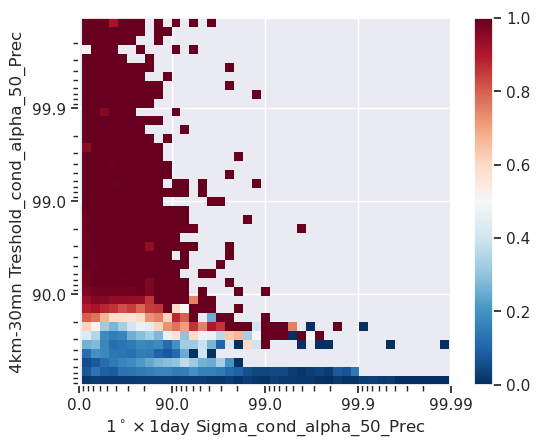

In [8]:
data, noise, count = jd.get_mcs_bin_fraction(0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.76))
jd.plot_data(data, noise, branch=False, fig= fig, ax = ax, vbds = (0, 1))

01Weird label : 304007.0
2345678Weird label : 234888.0
910Weird label : 234888.0
111213141516171819202122232425262728293031323334353637383940

<AxesSubplot:xlabel='1$^\\circ\\times 1$day Sigma_cond_alpha_50_Prec', ylabel='4km-30mn Treshold_cond_alpha_50_Prec'>

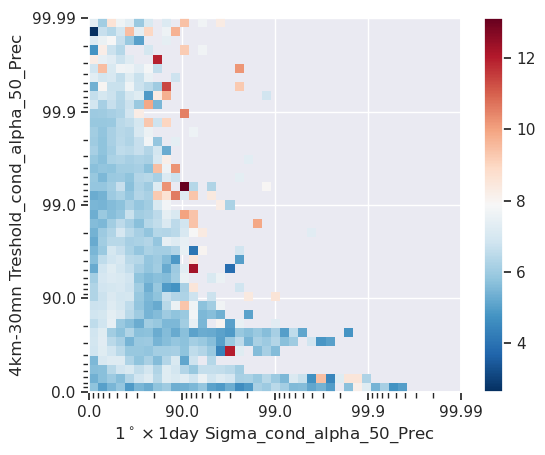

In [14]:
storm_var = jd.storm_attributes_on_jdist('duration', 'mean')
jd.plot_data(storm_var)

01Weird label : 304007.0
2345678Weird label : 234888.0
910Weird label : 234888.0
111213141516171819202122232425262728293031323334353637383940

<AxesSubplot:xlabel='1$^\\circ\\times 1$day Sigma_cond_alpha_50_Prec', ylabel='4km-30mn Treshold_cond_alpha_50_Prec'>

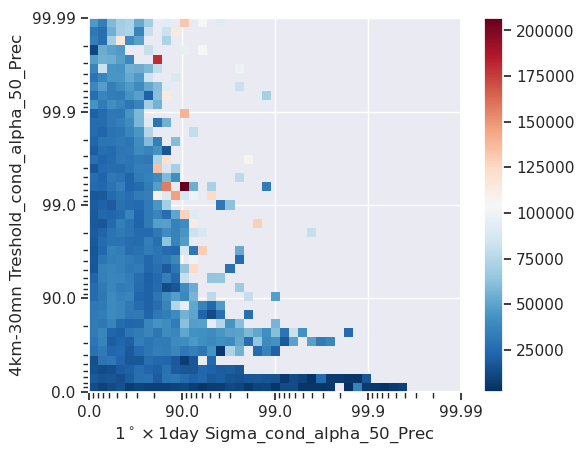

In [15]:
storm_var = jd.storm_attributes_on_jdist('surfmaxkm2_172Wm2', 'mean')
jd.plot_data(storm_var)

01Weird label : 304007.0
2345678Weird label : 234888.0
910Weird label : 234888.0
111213141516171819202122232425262728293031323334353637383940

<AxesSubplot:xlabel='1$^\\circ\\times 1$day Sigma_cond_alpha_50_Prec', ylabel='4km-30mn Treshold_cond_alpha_50_Prec'>

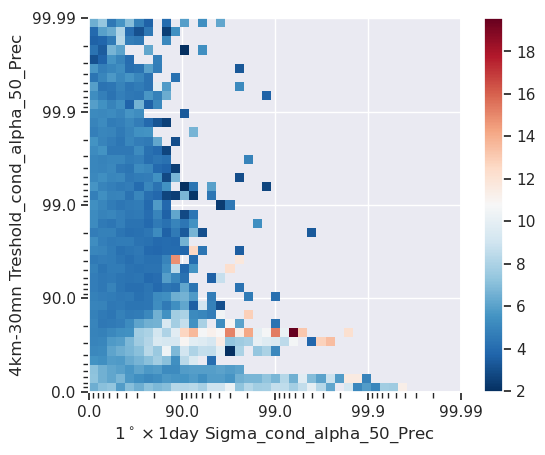

In [17]:
storm_var = jd.storm_attributes_on_jdist('vavg', 'mean')
jd.plot_data(storm_var)

In [31]:
jd.storms[0]

< MCS_IntParameters object:
 . label: 1
 . qc_MCS: 11101
 . duration: 17.25
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 19800.0
 . lonInit: 116.46
 . latInit: 21.32
 . Utime_End: 142200.0
 . lonEnd: 111.0
 . latEnd: 20.28
 . lonmin: 110.94
 . latmin: 20.24
 . lonmax: 116.86
 . latmax: 22.83
 . vavg: 4.66
 . dist: 578.95
 . olrmin: 188.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 377157.25
 . surfmaxkm2_132Wm2: 333978.47
 . surfmaxkm2_110Wm2: 308290.25
 . surfmaxkm2_90Wm2: 255521.17
 . surfcumkm2_172Wm2: 12840728.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 2.0
 . localtime_Init: 47700.0
 . localtime_End: 168840.0
 . clusters: <class 'tempest.load_toocan.MCS_Lifecycle'>
 >

# Joint distrib with Rcond instead of treshold

In [25]:
jd = joint_distrib.JointDistribution(gr, st, 
                                     var_id_1= "Sigma_cond_alpha_50_Prec", 
                                     var_id_2="Treshold_cond_alpha_50_Prec", 
                                     overwrite = True, 
                                     dist_bintype = 'invlogQ')

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Time elapsed for propagating all labels: 4.17 seconds


ds not found so forcing opening with xarray...


/home/mcarenso/code/tempest/tempest/joint_distrib.py:907: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


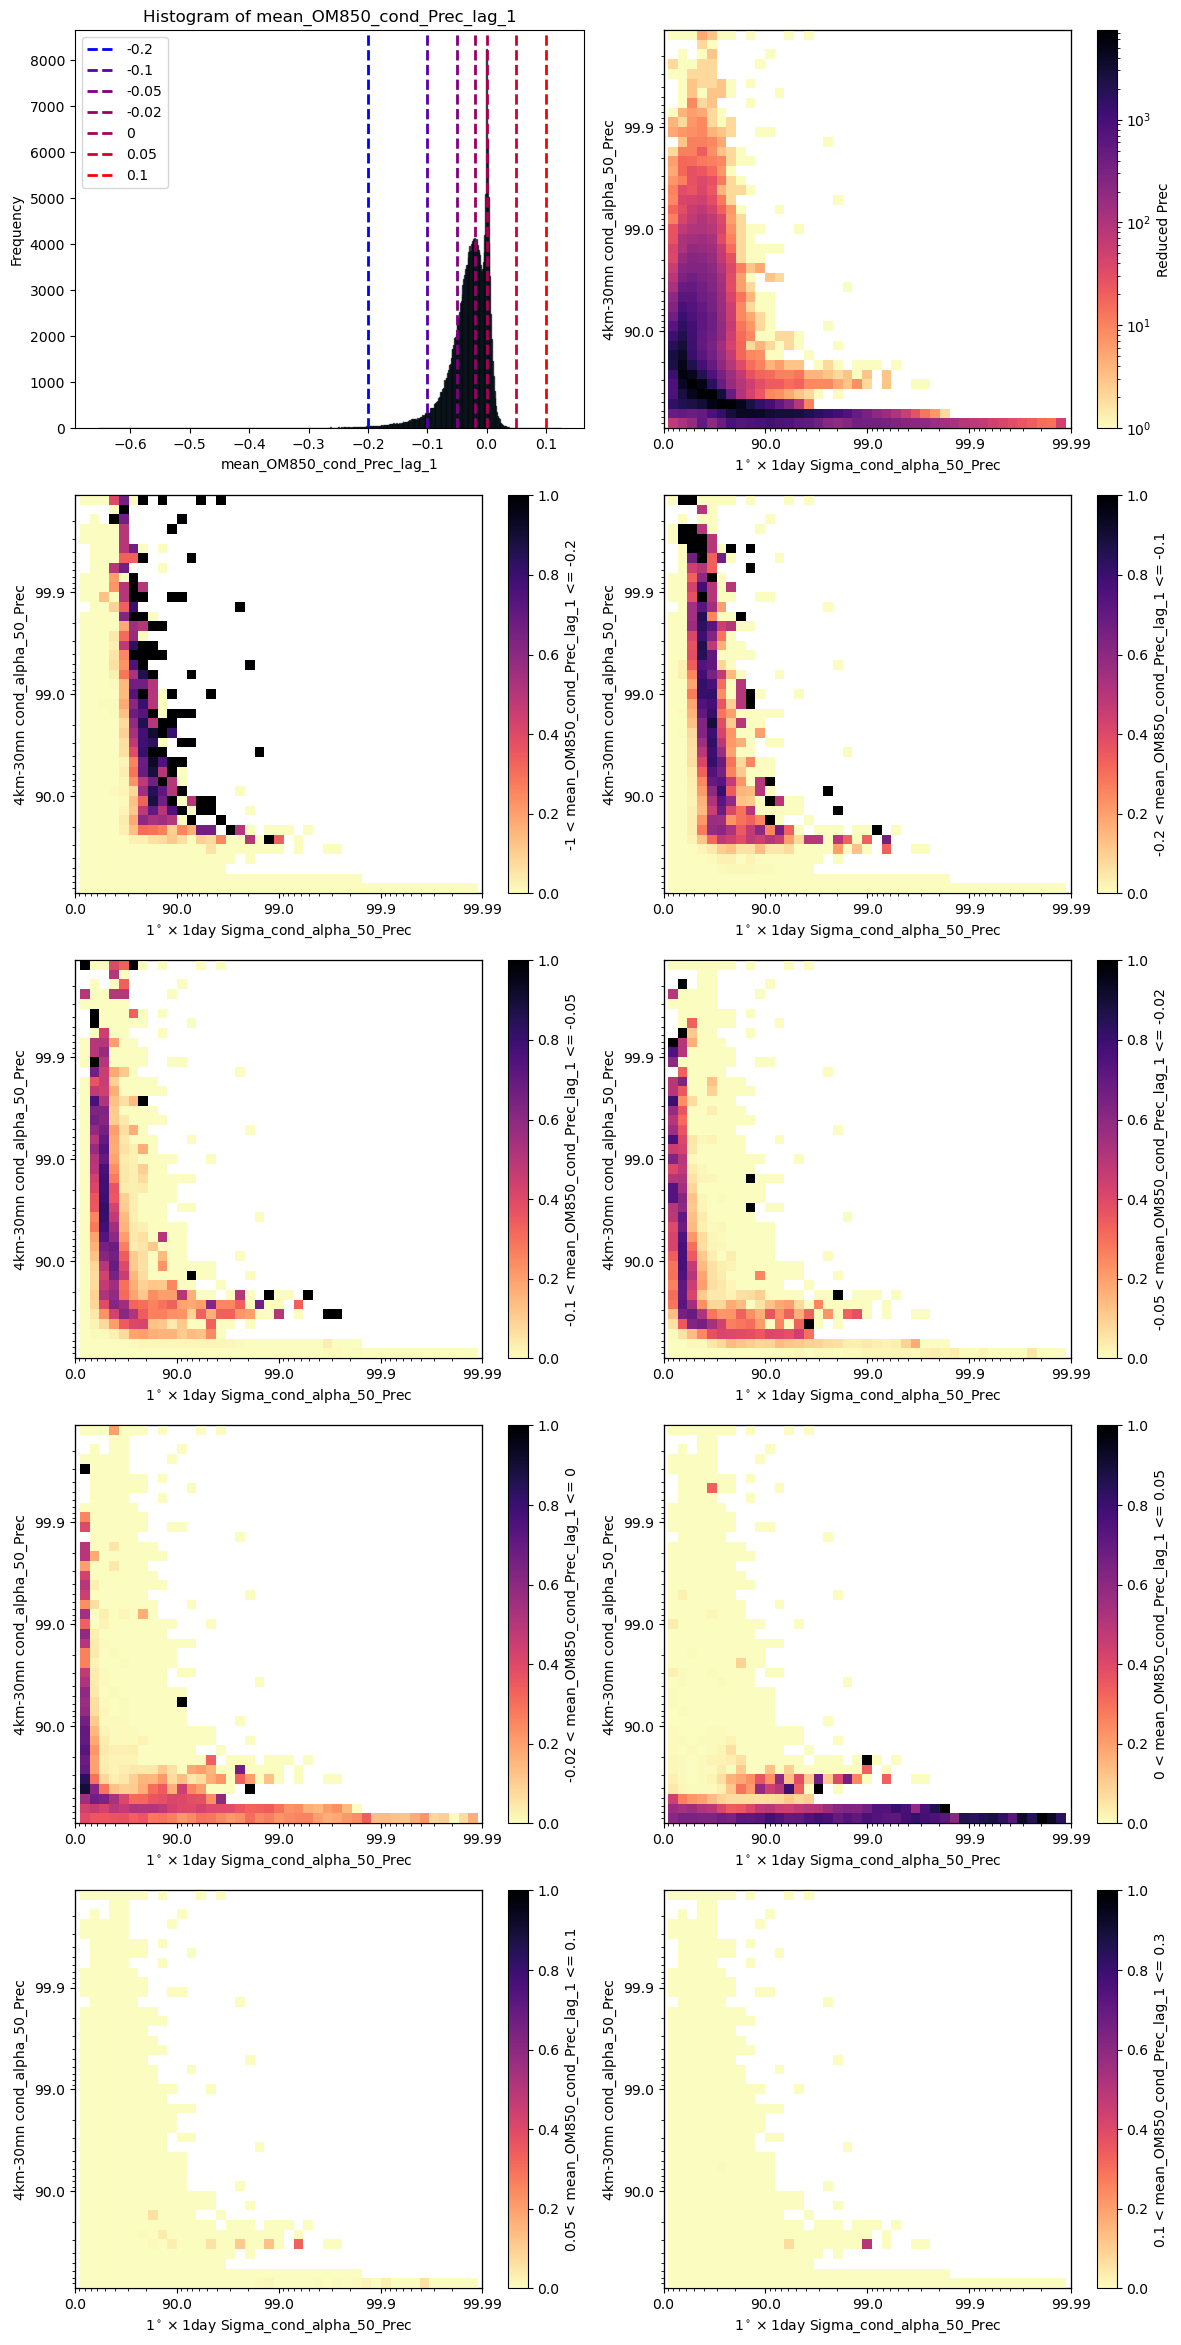

In [15]:
%matplotlib inline
cond_var = [-1, -0.2, -0.1, -0.05, -0.02, 0, 0.05, 0.1, 0.3]
var_id = "OM850_cond_Prec_lag_1"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)
plt.tight_layout()

ds not found so forcing opening with xarray...


/home/mcarenso/code/tempest/tempest/joint_distrib.py:907: RuntimeWarning: invalid value encountered in divide
  self.plot_data(bincount/bincount_reduced_prec, scale = 'linear',  cmap=plt.cm.magma_r, vbds = (0, 1), fig = fig, ax = ax, label = label)


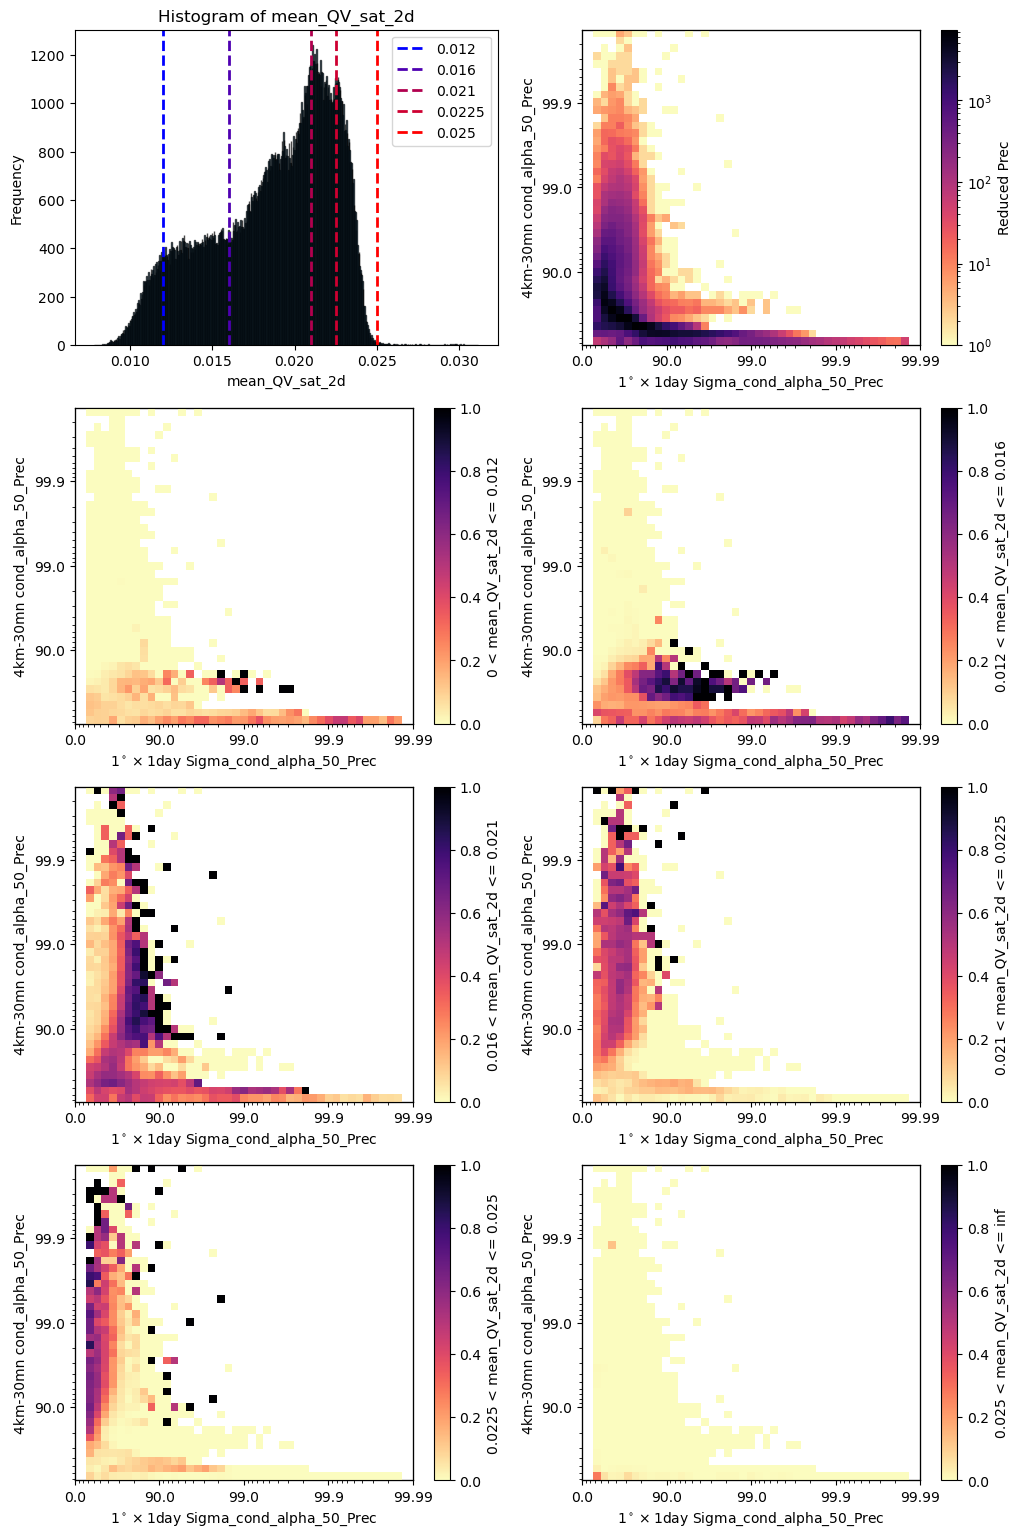

In [17]:
%matplotlib inline

cond_var = [0, 0.012, 0.016, 0.021, 0.0225, 0.025, +np.inf]
var_id = "QV_sat_2d"
func = "mean"
bincounts = jd.process_plot_var_cond_reducing_prec(var_id, cond_var, mask = ocean, func=func)

/home/mcarenso/code/tempest/tempest/joint_distrib.py:712: RuntimeWarning: invalid value encountered in scalar divide
  bin_fraction_mcs[i_bin,j_bin] = count_bin_mcs/count_bin


<AxesSubplot:xlabel='1$^\\circ\\times 1$day Sigma_cond_alpha_50_Prec', ylabel='4km-30mn Treshold_cond_alpha_50_Prec'>

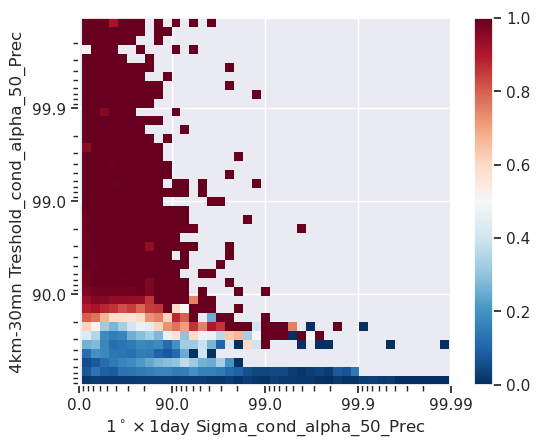

In [26]:
data, noise, count = jd.get_mcs_bin_fraction(0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4.76))
jd.plot_data(data, noise, branch=False, fig= fig, ax = ax, vbds = (0, 1))

#### dev that shouldnt have been here  but became necessary while in task

 ""

In [ ]:
def compute_conditional_data_over_density(self, data = None, mask = None):         
    var_days = list(data.days.values)  
    n_i, n_j = self.bincount.shape
    
    if data is not None : 
        data_over_density = np.full(shape=(n_i,n_j), fill_value=np.nan)
        if mask is not None : 
            data = data.where(mask)
            
    for d2 in range(n_j): 
            for d1 in range(n_i):
                data_where_joint_bin = self.get_mask_yxt(d1, d2, var_days=var_days)
                # return data_where_joint_bin
                # data_idx = tuple(np.argwhere((digit1==i1) & (digit2==i2)).T)
                if np.any(data_where_joint_bin==True):
                    to_mean = data.where(data_where_joint_bin)
                    if not np.all(np.isnan(to_mean)):
                        data_over_density[d1, d2] = np.nanmean(to_mean)
    if data is not None:
        return data_over_density
    
    
def plot_var_id_func_over_jdist(self, var_id, func, mask, cmap = plt.cm.viridis, vbds = (None, None), fig = None, ax = None):
    key = func+'_'+var_id
        # Trying to avoid the prec bug, maybe it's due to prec dataset already being open within jd
    if var_id == "Prec" : 
        ds_var = self.prec.sortby("days")[key]
    else :  
        ds_var = self.grid.get_var_id_ds(var_id).sortby("days")[key]
        
    var_days = list(ds_var.days.values)
    ds_var = ds_var.sel(days = var_days).where(mask) # redundant ? 
    
    var_over_density = self.compute_conditional_data_over_density(ds_var, mask = mask) #more a da than ds but whatever
    if fig is None : 
        fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 4.71))
    self.plot_data(var_over_density, data_noise = None, cmap = cmap, branch=False, vbds = vbds, fig = fig, ax = ax)